In [13]:
import sys
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

In [14]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

In [15]:
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [16]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784,
                            hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd',
                      optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [17]:
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.66 | lr:0.005177006567696568, weight decay:5.5992619109989864e-06
val acc:0.1 | lr:1.8032482845185956e-05, weight decay:1.3162182350750977e-07
val acc:0.38 | lr:0.0014232349343151032, weight decay:1.5968314675674475e-08
val acc:0.08 | lr:5.613326312481181e-06, weight decay:9.15303122911763e-07
val acc:0.12 | lr:0.0006537548479912506, weight decay:1.4237697593504352e-05
val acc:0.09 | lr:4.586030603842141e-05, weight decay:5.0942159661740005e-08
val acc:0.7 | lr:0.00862998386856516, weight decay:3.8102908780171635e-05
val acc:0.24 | lr:0.0008321637978507007, weight decay:1.7129754216913195e-05
val acc:0.11 | lr:7.547903110946693e-05, weight decay:5.295294970195383e-06
val acc:0.05 | lr:3.264894740237067e-05, weight decay:1.0388109634949834e-06
val acc:0.1 | lr:1.1831882877624609e-06, weight decay:1.5784978901147065e-08
val acc:0.56 | lr:0.004596708770108137, weight decay:2.3743628952495366e-08
val acc:0.1 | lr:0.00015107646245178446, weight decay:1.3151327733246397e-07
val acc

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.79) | lr:0.0054999379803642385, weight decay:4.539124629867001e-06
Best-2(val acc:0.76) | lr:0.008299325999739468, weight decay:2.0109942556759993e-07
Best-3(val acc:0.74) | lr:0.008914602271567065, weight decay:5.725222563044407e-07
Best-4(val acc:0.71) | lr:0.005567166947472704, weight decay:1.976346588803176e-05
Best-5(val acc:0.7) | lr:0.00862998386856516, weight decay:3.8102908780171635e-05
Best-6(val acc:0.7) | lr:0.006617877776635297, weight decay:1.9376044948594836e-08
Best-7(val acc:0.68) | lr:0.008162965612074712, weight decay:1.2884776190356158e-08
Best-8(val acc:0.66) | lr:0.005177006567696568, weight decay:5.5992619109989864e-06
Best-9(val acc:0.66) | lr:0.006093866447383979, weight decay:8.878597350882694e-07
Best-10(val acc:0.66) | lr:0.004272812513885612, weight decay:3.633870172554298e-05
Best-11(val acc:0.65) | lr:0.0046761147820276435, weight decay:2.48756771037562e-07
Best-12(val acc:0.64) 

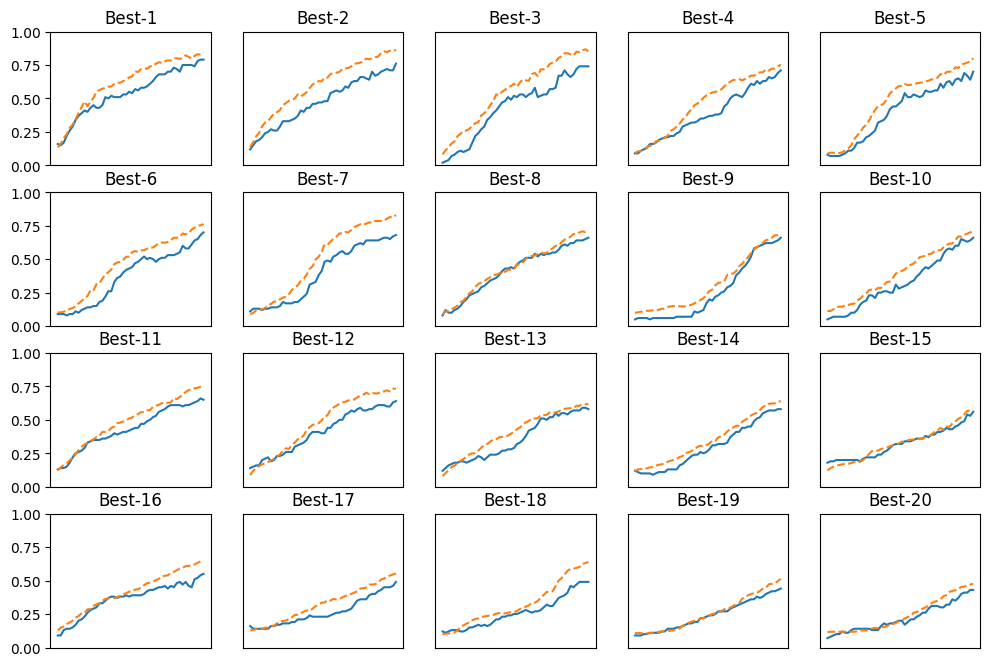

In [18]:
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0
plt.figure(figsize=(12, 8))
for key, val_acc_list in sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()